<a href="https://www.kaggle.com/code/abdulrahmanalabrash/housing-data-wrangler?scriptVersionId=180434965" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

  # Data Cleaning

When working with multiple data sources, there are many chances for data to be incorrect, duplicated, or mislabeled. If data is wrong, outcomes and algorithms are unreliable, even though they may look correct. Data cleaning is the process of changing or eliminating garbage, incorrect, duplicate, corrupted, or incomplete data in a dataset.

## Import the data 

In [1]:
# import necessary library 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# read the data  
df = pd.read_excel (r'/kaggle/input/data-cleaning/house_price_data_7000.xlsx')
# Print the first five rows of the data
df.head()

,Order,Brüt m²,Net m²,Oda Sayısı,Banyo Sayısı,Binadaki Kat Sayısı,Bulunduğu Kat,Bina Yaşı,Isıtma Tipi,Mobilya Durumu,...,Location Lat,Location Lon,Location1,Location2,Location3,Aidat,Takasa Uygun,Station Name,Location Lat.1,Location Lon.1
0,1117,110,100.0,3+1,1,3,3,3,Kombi (Doğalgaz),NaN,...,41.051309,28.042897,Gümüşyaka,Silivri,İstanbul,NaN,Evet,Beylikdüzü Sondurak (TÜYAP) Metrobüs Durağı,41.021789,28.625406
1,5958,105,96.0,3+1,1,3,3,3,Kombi (Doğalgaz),NaN,...,41.051382,28.042956,Gümüşyaka,Silivri,İstanbul,NaN,NaN,- Beykent Metrobüs Durağı,41.019212,28.631626
2,5709,110,100.0,2+1,2,4,Yüksek Giriş,0,Kombi (Doğalgaz),Eşyasız,...,41.125086,28.062348,Balaban,Silivri,İstanbul,0.0,Evet,- Cumhuriyet Mahallesi Metrobüs Durağı,41.015435,28.641765
3,366,95,80.0,2+1,1,4,1,2,Kombi (Doğalgaz),Eşyasız,...,41.080407,28.079158,Balaban,Silivri,İstanbul,NaN,NaN,- Beylikdüzü Belediye Metrobüs Durağı,41.012566,28.649338
4,2540,135,130.0,3+1,1,5,Yüksek Giriş,0,Kombi (Doğalgaz),Eşyasız,...,41.091091,28.091119,Sancaktepe,Silivri,İstanbul,80.0,Evet,- Beylikdüzü Metrobüs Durağı,41.012566,28.649338


In [2]:
#print the info of the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7039 entries, 0 to 7038
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order                7039 non-null   int64  
 1   Brüt m²              7039 non-null   int64  
 2   Net m²               6959 non-null   float64
 3   Oda Sayısı           7037 non-null   object 
 4   Banyo Sayısı         7038 non-null   object 
 5   Binadaki Kat Sayısı  6743 non-null   object 
 6   Bulunduğu Kat        6786 non-null   object 
 7   Bina Yaşı            6776 non-null   object 
 8   Isıtma Tipi          6740 non-null   object 
 9   Mobilya Durumu       6354 non-null   object 
 10  Kullanım Durumu      6688 non-null   object 
 11  Yapının Durumu       4432 non-null   object 
 12  Konut Şekli          5651 non-null   object 
 13  Kira Getirisi        5273 non-null   float64
 14  Kimden               4274 non-null   object 
 15  Krediye Uygun        7039 non-null   o

### Dealling with missing values and preprocessing some features

Net m² binned
small     3785
normal    2983
big        270
Name: count, dtype: int64


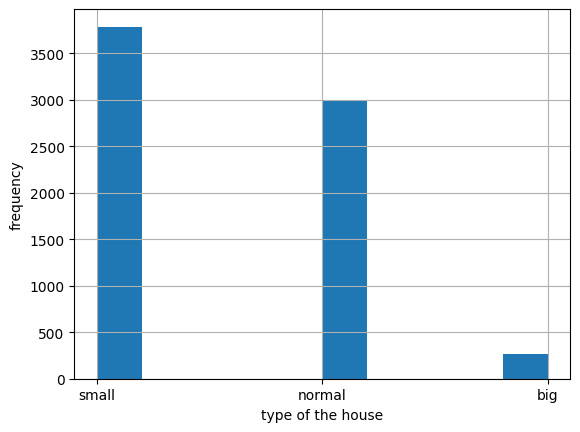

In [3]:
# Replace the missing values in 'Net m²' by multiplying 'Brüt m²' with 90 percent
df['Net m²'].fillna(df["Brüt m²"] * 0.9, inplace=True)

# Data binning, we want to change the area of the house to one of three catagories (small, normall, big)
"""
Binning is a common technique used for data preprocessing, especially when dealing with continuous 
numerical data that we want to categorize into discrete groups or ranges.
"""
bins = [0, 100, 200, 20000]
group_names = ["small", "normal", "big"]
df["Net m² binned"] = pd.cut(df["Net m²"], bins, labels=group_names)

# Print the counts of each bin
print(df['Net m² binned'].value_counts())

# Plot the histogram
hist = df["Net m² binned"].hist()
plt.ylabel('frequency')
plt.xlabel('type of the house')
plt.show()


In [4]:
#change the number of rooms to integers and drop the missing values 
df['Oda Sayısı'].value_counts()
df["Oda Sayısı"] = df["Oda Sayısı"].replace("2+1",3)
df["Oda Sayısı"] = df["Oda Sayısı"].replace("3+1",4)
df["Oda Sayısı"] = df["Oda Sayısı"].replace("1+1",2)
df["Oda Sayısı"] = df["Oda Sayısı"].replace("4+1",5)
df["Oda Sayısı"] = df["Oda Sayısı"].replace("4+2",6)
df["Oda Sayısı"] = df["Oda Sayısı"].replace("3+2",5)
df["Oda Sayısı"] = df["Oda Sayısı"].replace("5+1",6)
df["Oda Sayısı"] = df["Oda Sayısı"].replace("5+2",7)
df["Oda Sayısı"] = df["Oda Sayısı"].replace("2+2",4)
df["Oda Sayısı"] = df["Oda Sayısı"].replace("6+2",8)
df["Oda Sayısı"] = df["Oda Sayısı"].replace("1+0 (Stüdyo)",1)
df["Oda Sayısı"] = df["Oda Sayısı"].replace("6+1",7)
df["Oda Sayısı"] = df["Oda Sayısı"].replace("10 ve üzeri",10)
df["Oda Sayısı"] = df["Oda Sayısı"].replace("7+2",9)
df["Oda Sayısı"] = df["Oda Sayısı"].replace("4+3",7)
df["Oda Sayısı"] = df["Oda Sayısı"].replace("5+3",8)
df["Oda Sayısı"] = df["Oda Sayısı"].replace("8+4",12)
df["Oda Sayısı"] = df["Oda Sayısı"].replace("7+1",8)
df["Oda Sayısı"] = df["Oda Sayısı"].replace("9+1",10)
df.dropna(subset=['Oda Sayısı'],inplace = True)
df['Oda Sayısı'] = df['Oda Sayısı'].astype("int64")
print(df['Oda Sayısı'].value_counts())

Oda Sayısı
3     3328
4     2123
5      613
2      527
6      302
7       90
8       25
1       15
10       8
9        5
12       1
Name: count, dtype: int64


In [5]:
#replace the missing values with 2 since it's the common number in Istanbul 
#reduce the catagories to three-  where 3 represents the number of bathrooms that more than or equal to 3 
df['Banyo Sayısı'] = df['Banyo Sayısı'].fillna(2)
df['Banyo Sayısı'].value_counts()
df["Banyo Sayısı"] = df["Banyo Sayısı"].replace("6 ve üzeri",3)
df["Banyo Sayısı"] = df["Banyo Sayısı"].replace("4",3)
df["Banyo Sayısı"] = df["Banyo Sayısı"].replace("5",3)
df["Banyo Sayısı"] = df["Banyo Sayısı"].replace("3",3)
df["Banyo Sayısı"] = df["Banyo Sayısı"].replace("0",1)
df['Banyo Sayısı'] = df['Banyo Sayısı'].astype("int64")
print(df["Banyo Sayısı"].value_counts())

Banyo Sayısı
1    4402
2    2337
3     298
Name: count, dtype: int64


In [6]:
print(df["Location3"].value_counts())

Location3
 İstanbul    7037
Name: count, dtype: int64


In [7]:
#Since all the houses are in Istanbul, there's no need to keep this column
selectedData = df.drop(['Location3'] , axis= 1)


In [8]:
#reduce the catagories of number of floors to three
df['Binadaki Kat Sayısı']= df['Binadaki Kat Sayısı'].replace("1","less or equal 3")
df['Binadaki Kat Sayısı']= df['Binadaki Kat Sayısı'].replace("2","less or equal 3")
df['Binadaki Kat Sayısı']= df['Binadaki Kat Sayısı'].replace("3","less or equal 3")
df['Binadaki Kat Sayısı']= df['Binadaki Kat Sayısı'].replace("6","more than 5")
df['Binadaki Kat Sayısı']= df['Binadaki Kat Sayısı'].replace("7","more than 5")
df['Binadaki Kat Sayısı']= df['Binadaki Kat Sayısı'].replace("8","more than 5")
df['Binadaki Kat Sayısı']= df['Binadaki Kat Sayısı'].replace("9","more than 5")
df['Binadaki Kat Sayısı']= df['Binadaki Kat Sayısı'].replace("10","more than 5")
df['Binadaki Kat Sayısı']= df['Binadaki Kat Sayısı'].replace("10-20 arası","more than 10")
df['Binadaki Kat Sayısı']= df['Binadaki Kat Sayısı'].replace("20 ve üzeri","more than 10")

In [9]:
#reduce the catagories of the age of building to three
df['Bina Yaşı']= df['Bina Yaşı'].replace("1","between 1-10")
df['Bina Yaşı']= df['Bina Yaşı'].replace("2","between 1-10")
df['Bina Yaşı']= df['Bina Yaşı'].replace("3","between 1-10")
df['Bina Yaşı']= df['Bina Yaşı'].replace("4","between 1-10")
df['Bina Yaşı']= df['Bina Yaşı'].replace("5","between 1-10")
df['Bina Yaşı']= df['Bina Yaşı'].replace("6-10 arası","between 1-10")
df['Bina Yaşı']= df['Bina Yaşı'].replace("11-15 arası","between 11-20")
df['Bina Yaşı']= df['Bina Yaşı'].replace("16-20 arası","between 11-20")
df['Bina Yaşı']= df['Bina Yaşı'].replace("21-25 arası","more than 20")
df['Bina Yaşı']= df['Bina Yaşı'].replace("26-30 arası","more than 20")
df['Bina Yaşı']= df['Bina Yaşı'].replace("31-35 arası","more than 20")
df['Bina Yaşı']= df['Bina Yaşı'].replace("36-40 arası","more than 20")
df['Bina Yaşı']= df['Bina Yaşı'].replace("40 ve üzeri","more than 20")


In [10]:
"""
replace the missing values in User Status we change the missing values to Kiracılı "With tenant", since
most houses in Istanbul are rented
"""
df['Kullanım Durumu'] = df['Kullanım Durumu'].replace(np.nan,"Kiracılı")
pd.get_dummies(df["Kullanım Durumu"])
print(df['Kullanım Durumu'].value_counts())

Kullanım Durumu
Boş            4463
Kiracılı       1295
Mülk Sahibi    1279
Name: count, dtype: int64


In [11]:
"""
replace the Missing values in (from) with "sahibinden" "owner", since companies are normally aware of
the importantce of mentioning their presence to protect their rights
"""
df['Kimden'] = df['Kimden'].replace(np.nan,"Sahibinden")
pd.get_dummies(df["Kimden"])

print(df['Kimden'].value_counts())

Kimden
Danışman              3637
Sahibinden            2764
İnşaat Geliştirici     636
Name: count, dtype: int64


In [12]:
 # Replace the Missing values in 'state of the building (Yapının Durumu)' by looking at the age of the building (Bina Yaşı)
# If it's 0, assign "Sıfır" "New (Zero)"; otherwise, assign "İkinci El" "Second Hand"
df["Yapının Durumu"] = df["Yapının Durumu"].fillna(df['Bina Yaşı'].apply(lambda x: 'Sıfır' if x == 0 else 'İkinci El'))
print(df['Yapının Durumu'].value_counts())


Yapının Durumu
İkinci El           4562
Sıfır               2450
Yapım Aşamasında      25
Name: count, dtype: int64


In [13]:
"""
replace the Missing values in "Takasa Uygun" "Available to exchange"with Hayır since the majority
doesn't prefer exchanging, otherwise they would mention that 

Make them dummies
"""
df['Takasa Uygun'] = df['Takasa Uygun'].replace(np.nan,"Hayır")
print(df['Takasa Uygun'].value_counts())

Takasa Uygun
Hayır    5275
Evet     1762
Name: count, dtype: int64


In [14]:
#replace the missing values in (Apartment dues) "Aidat" with 0, since this is the majority in Istanbul
df['Aidat'] = df['Aidat'].replace(np.nan,0)

In [15]:
#We want to have an idea about Rental Income (Kira Getirisi)
print(df["Kira Getirisi"].value_counts()) 

print("Number of missing values is", df["Kira Getirisi"].isna().sum())


print("The number of none missing values is ",sum (df["Kira Getirisi"].value_counts()))

print("There's this number of categories" ,len (df["Kira Getirisi"].value_counts()))

Kira Getirisi
0.0          2801
1000.0        286
1500.0        254
1200.0        209
2000.0        165
             ... 
2225.0          1
12501.0         1
1750000.0       1
35000.0         1
8001200.0       1
Name: count, Length: 103, dtype: int64
Number of missing values is 1766
The number of none missing values is  5271
There's this number of categories 103


In [16]:
# Since there's 4,567 value between missing values and 0, it wouldn't be very helpful,so we should drop the column

selectedData = df.drop(['Kira Getirisi'] , axis= 1)
selectedData = selectedData.dropna()
titels = list(selectedData.columns)
titels
titels[23],titels[15] = titels[15],titels[23]
titels[0],titels[15] = titels[15],titels[0]
titels[0],titels[1] = titels[1],titels[0]
titels[1],titels[2] = titels[2],titels[1]
selectedData = selectedData[titels]
selectedData = selectedData.drop(['Order'] , axis= 1)
selectedData

,Brüt m²,Net m²,Station Name,Oda Sayısı,Banyo Sayısı,Binadaki Kat Sayısı,Bulunduğu Kat,Bina Yaşı,Isıtma Tipi,Mobilya Durumu,...,Location Lon,Location1,Location2,Location3,Aidat,Takasa Uygun,Price,Location Lat.1,Location Lon.1,Net m² binned
3,95,80.0,- Beylikdüzü Belediye Metrobüs Durağı,3,1,4,1,between 1-10,Kombi (Doğalgaz),Eşyasız,...,28.079158,Balaban,Silivri,İstanbul,0.0,Hayır,235000,41.012566,28.649338,small
8,110,100.0,- Saadetdere Mahallesi Metrobüs Durağı,3,1,4,2,between 11-20,Soba (Doğalgaz),Eşyasız,...,28.228995,Mimar Sinan,Silivri,İstanbul,0.0,Hayır,215000,40.999710,28.693090,small
11,160,145.0,- Avcılar Merkez Üniversite Kampüsü Metrobüs D...,4,1,5,1,between 11-20,Kombi (Doğalgaz),Eşyasız,...,28.240421,Piri Mehmet Paşa,Silivri,İstanbul,0.0,Evet,420000,40.983718,28.725800,normal
13,180,160.0,- Büyükşehir Belediye Sosyal Tesisleri Metrobü...,4,2,5,5,between 1-10,Kat Kaloriferi,Eşyasız,...,28.242893,Piri Mehmet Paşa,Silivri,İstanbul,0.0,Hayır,400000,40.978102,28.745493,normal
14,180,155.0,- Küçükçekmece Metrobüs Durağı,4,2,more than 5,3,between 1-10,Merkezi Sistem (Isı Payı Ölçer),Eşyasız,...,28.243468,Yeni,Silivri,İstanbul,330.0,Hayır,550000,40.988100,28.770120,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,140,120.0,Tuzla Marmaray İstasyonu,4,2,5,1,between 1-10,Kombi (Doğalgaz),Eşyasız,...,28.622911,Adnan Kahveci,Beylikdüzü,İstanbul,0.0,Hayır,380000,40.830029,29.322270,normal
236,225,220.0,Çayırova Marmaray İstasyonu,6,2,more than 5,6,0,Kombi (Doğalgaz),Eşyasız,...,28.623024,Adnan Kahveci,Beylikdüzü,İstanbul,0.0,Hayır,559999,40.810533,29.347412,big
237,185,155.0,GTÜ - Fatih Marmaray İstasyonu,4,2,more than 10,Bahçe katı,between 11-20,Kombi (Doğalgaz),Sadece Mutfak,...,28.623369,Adnan Kahveci,Beylikdüzü,İstanbul,160.0,Hayır,355000,40.807548,29.364127,normal
239,180,170.0,Darıca Marmaray İstasyonu,4,2,5,1,between 1-10,Kombi (Doğalgaz),Eşyasız,...,28.623598,Adnan Kahveci,Beylikdüzü,İstanbul,0.0,Hayır,475000,40.791432,29.391865,normal


<Axes: >

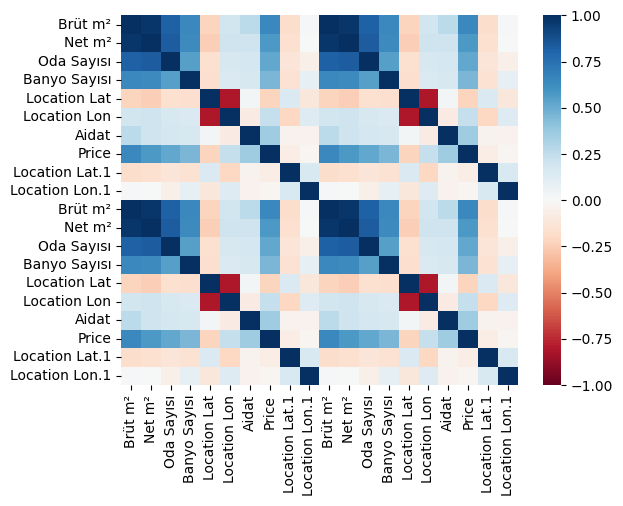

In [17]:



# Identify and one-hot encode categorical columns
categorical_columns = selectedData.select_dtypes(include=['object']).columns
selectedData_encoded = pd.get_dummies(selectedData, columns=categorical_columns)

# Exclude one-hot encoded columns from the correlation matrix
numerical_columns = selectedData.select_dtypes(include=['float64', 'int64']).columns
selectedData_numerical = pd.concat([selectedData[numerical_columns], selectedData_encoded[numerical_columns]], axis=1)

# Compute and plot the correlation matrix
sns.heatmap(selectedData_numerical.corr(), cmap="RdBu", vmin=-1, vmax=1)


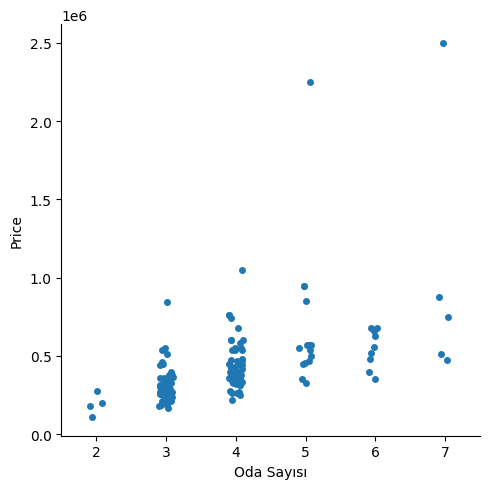

In [18]:
sns.catplot(x="Oda Sayısı", y="Price", data=selectedData)

In [19]:
selectedData_test = selectedData[["Oda Sayısı","Bina Yaşı","Price"]]
selectedData_grp = selectedData_test.groupby(["Oda Sayısı","Bina Yaşı"], as_index =False).mean()
selectedData_pivot = selectedData_grp.pivot(index ="Oda Sayısı",columns = "Bina Yaşı")
selectedData_pivot

Price                                           
Bina Yaşı              0   between 1-10  between 11-20 more than 20
Oda Sayısı                                                         
2                    NaN  219333.333333  110000.000000          NaN
3           3.392207e+05  294411.764706  215000.000000     310475.0
4           4.606190e+05  456472.222222  364545.454545     220000.0
5           6.385000e+05  787375.000000  498333.333333          NaN
6           5.297498e+05  567600.000000            NaN          NaN
7           2.500000e+06  620000.000000            NaN     749900.0

In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Identify and label encode categorical columns
label_encoder = LabelEncoder()
selectedData_encoded = selectedData.copy()
categorical_columns = selectedData_encoded.select_dtypes(include=['object']).columns
selectedData_encoded[categorical_columns] = selectedData_encoded[categorical_columns].apply(label_encoder.fit_transform)

# Exclude categorical columns from the correlation matrix
numerical_columns = selectedData_encoded.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = selectedData_encoded[numerical_columns].corr()
print(correlation_matrix)

                      Brüt m²    Net m²  Station Name  Oda Sayısı  \
Brüt m²              1.000000  0.970037      0.095339    0.819751   
Net m²               0.970037  1.000000      0.131318    0.834148   
Station Name         0.095339  0.131318      1.000000    0.110396   
Oda Sayısı           0.819751  0.834148      0.110396    1.000000   
Banyo Sayısı         0.648071  0.640317      0.053205    0.548057   
Binadaki Kat Sayısı -0.038721 -0.024154     -0.047459   -0.181043   
Bulunduğu Kat        0.100172  0.134857     -0.012184    0.163766   
Bina Yaşı            0.030988  0.058975      0.018378    0.059382   
Isıtma Tipi         -0.045307 -0.060438      0.093846   -0.068641   
Mobilya Durumu      -0.031858 -0.052436     -0.137640   -0.023708   
Kullanım Durumu      0.097505  0.095287      0.027181    0.146469   
Yapının Durumu      -0.097768 -0.100004     -0.013617   -0.130681   
Konut Şekli          0.478393  0.523434      0.067224    0.574855   
Kimden              -0.082496 -0.0

<Axes: >

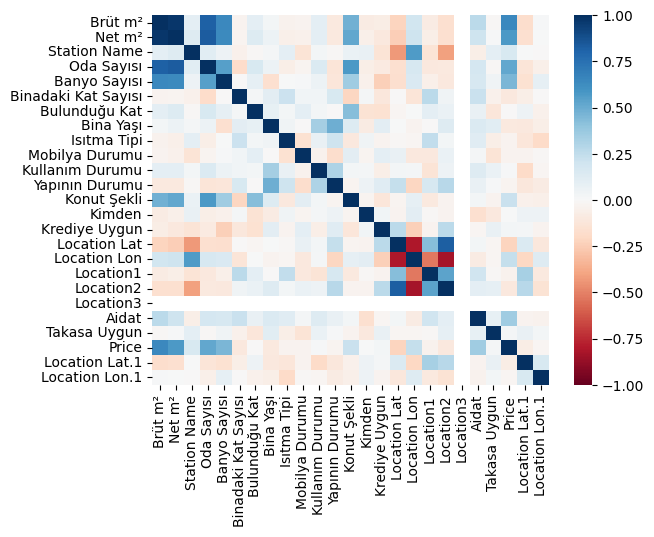

In [21]:
sns.heatmap(correlation_matrix, cmap="RdBu", vmin=-1, vmax=1)

In [22]:
print(df['Location1'].value_counts())

Location1
Cumhuriyet       262
Kayabaşı         193
Merkez           160
Fatih            121
Yakuplu          108
                ... 
Meşrutiyet         1
Bahçeköy Yeni      1
Fulya              1
Cihannüma          1
Rumeli Hisarı      1
Name: count, Length: 482, dtype: int64


<Axes: xlabel='Net m² binned', ylabel='Price'>

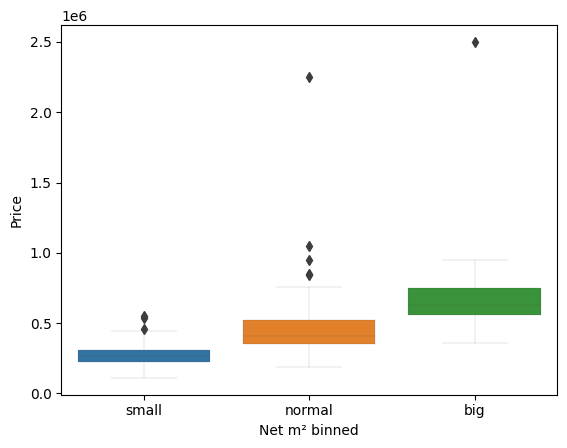

In [23]:
sns.color_palette("Paired")
sns.boxplot(x="Net m² binned", y="Price", data=selectedData,linewidth=0.1)

In [24]:
selectedData.head()
selectedData = pd.get_dummies(selectedData,drop_first = True)

In [25]:
selectedData_numerical

,Brüt m²,Net m²,Oda Sayısı,Banyo Sayısı,Location Lat,Location Lon,Aidat,Price,Location Lat.1,Location Lon.1,Brüt m²,Net m²,Oda Sayısı,Banyo Sayısı,Location Lat,Location Lon,Aidat,Price,Location Lat.1,Location Lon.1
3,95,80.0,3,1,41.080407,28.079158,0.0,235000,41.012566,28.649338,95,80.0,3,1,41.080407,28.079158,0.0,235000,41.012566,28.649338
8,110,100.0,3,1,41.078480,28.228995,0.0,215000,40.999710,28.693090,110,100.0,3,1,41.078480,28.228995,0.0,215000,40.999710,28.693090
11,160,145.0,4,1,41.076610,28.240421,0.0,420000,40.983718,28.725800,160,145.0,4,1,41.076610,28.240421,0.0,420000,40.983718,28.725800
13,180,160.0,4,2,41.077063,28.242893,0.0,400000,40.978102,28.745493,180,160.0,4,2,41.077063,28.242893,0.0,400000,40.978102,28.745493
14,180,155.0,4,2,41.082942,28.243468,330.0,550000,40.988100,28.770120,180,155.0,4,2,41.082942,28.243468,330.0,550000,40.988100,28.770120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,140,120.0,4,2,40.994777,28.622911,0.0,380000,40.830029,29.322270,140,120.0,4,2,40.994777,28.622911,0.0,380000,40.830029,29.322270
236,225,220.0,6,2,41.006788,28.623024,0.0,559999,40.810533,29.347412,225,220.0,6,2,41.006788,28.623024,0.0,559999,40.810533,29.347412
237,185,155.0,4,2,41.003314,28.623369,160.0,355000,40.807548,29.364127,185,155.0,4,2,41.003314,28.623369,160.0,355000,40.807548,29.364127
239,180,170.0,4,2,40.997886,28.623598,0.0,475000,40.791432,29.391865,180,170.0,4,2,40.997886,28.623598,0.0,475000,40.791432,29.391865


In [26]:
# Split X into random train and test subsets and normalize it
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
X = selectedData.drop("Price",axis = 1)
Y = selectedData["Price"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train





array([[-0.86262173, -0.98217074, -0.92489215, ...,  0.61512469,
        -1.32542701, -0.32969024],
       [-0.57601777, -0.43770653, -0.01778639, ..., -1.62568667,
         0.75447384, -0.32969024],
       [-0.48048311, -0.43770653, -0.01778639, ...,  0.61512469,
         0.75447384, -0.32969024],
       ...,
       [ 0.9525367 ,  1.39169324,  0.88931938, ...,  0.61512469,
         0.75447384, -0.32969024],
       [-1.14922569, -1.19995643, -0.92489215, ...,  0.61512469,
        -1.32542701, -0.32969024],
       [-0.76708708, -0.76438506, -0.01778639, ...,  0.61512469,
        -1.32542701, -0.32969024]])

In [27]:
#1 Linear regression
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train,Y_train)

In [28]:
reg.score(X_train,Y_train)

1.0

In [29]:
reg.score(X_test,Y_test)

-1.8221217228183075

In [30]:
# Lasso regression
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha = 1000,max_iter=1000,tol=0.1)
lasso_reg.fit(X_train,Y_train)

Lasso(alpha=1000, tol=0.1)

In [31]:
lasso_reg.score(X_train,Y_train)

0.9867659068521261

In [32]:
lasso_reg.score(X_test,Y_test)

-0.4418525406753757

In [33]:
# Ridge regression
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=1000, max_iter=1000, tol= 0.1)
ridge_reg.fit(X_train,Y_train)

Ridge(alpha=1000, max_iter=1000, tol=0.1)

In [34]:
ridge_reg.score(X_train,Y_train)

0.40500094988495794

In [35]:
ridge_reg.score(X_test,Y_test)

0.16464319570569153

In [36]:
# Cross validated regression
# Cross-validation is a resampling method that 
# uses different portions of the data to test and train a model on different iterations.
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
scores = cross_val_score(lr, X, Y, cv=4)
print(scores)
np.mean(scores)


[-5.64145053 -2.12601352  0.27463167 -0.38840569]


-1.9703095171103555